In [1]:
import numpy as np

# Linear regression

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     16.89
Date:                Sun, 20 Feb 2022   Prob (F-statistic):            0.00339
Time:                        00:17:40   Log-Likelihood:                -12.624
No. Observations:                  10   AIC:                             29.25
Df Residuals:                       8   BIC:                             29.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1245      0.413      5.146      0.0

c:\users\attila_sajo\miniconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


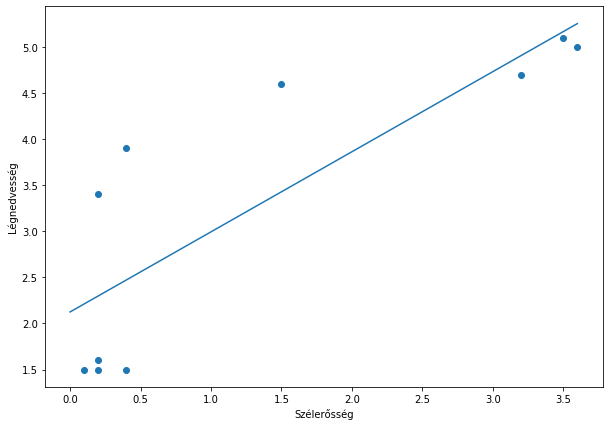

In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)

adatok = np.array([
              [5.1, 3.5],
              [4.7, 3.2],
              [4.6, 1.5],
              [5.0, 3.6],
              [3.4, 0.2],
              [1.5, 0.1],
              [1.6, 0.2],
              [1.5, 0.4],
              [3.9, 0.4],
              [1.5, 0.2]
           ])

# Légnedvesség 
y = adatok[:,0]
# egy Konstans + Szélerősség 
X = np.array([ [1,x] for x in adatok[:, 1] ])
# model
illesztett_model = sm.OLS(y,X).fit()
print(illesztett_model.summary())

# megfigyelések
plt.scatter(X[:, 1], y)
# model
szel = np.array([0]+sorted(X[:, 1]))
plt.plot(szel, illesztett_model.params[0] + illesztett_model.params[1] * szel)
plt.xlabel("Szélerősség")
plt.ylabel("Légnedvesség")
plt.show()

In [3]:
legroszabb = np.mean(adatok[:, 0])
print(f"Legroszabb modell, y={legroszabb}")
ss_m = np.sum((legroszabb-adatok[:, 0])**2)
legjobb = illesztett_model.params[0] + illesztett_model.params[1] * adatok[:, 1]
ss_l = np.sum((legjobb-adatok[:, 0])**2)

r2 = (ss_m-ss_l)/ss_m
print("Determinációs együtható:", r2)
r2a = 1-(1-r2)*(len(adatok)-1)/(len(adatok)-1-1)
print("Korrigált Determinációs együtható:", r2a)

Legroszabb modell, y=3.28
Determinációs együtható: 0.6786491394451236
Korrigált Determinációs együtható: 0.638480281875764


In [4]:
from scipy import stats
M_S_E = (ss_l)/(len(X)-len(X[0]))
v_b = M_S_E*(np.linalg.inv(np.dot(X.T,X)).diagonal())
s_b = np.sqrt(v_b)
print("Standard error:\t", s_b)
t_b = illesztett_model.params / s_b
print("t:\t\t", t_b)
p_val =[2*(1-stats.t.cdf(np.abs(i),(len(X)-len(X[0])))) for i in t_b]
p_val = np.round(p_val,3)
print("p-érték:\t", p_val)

Standard error:	 [0.41283503 0.21136315]
t:		 [5.146195   4.11034155]
p-érték:	 [0.001 0.003]


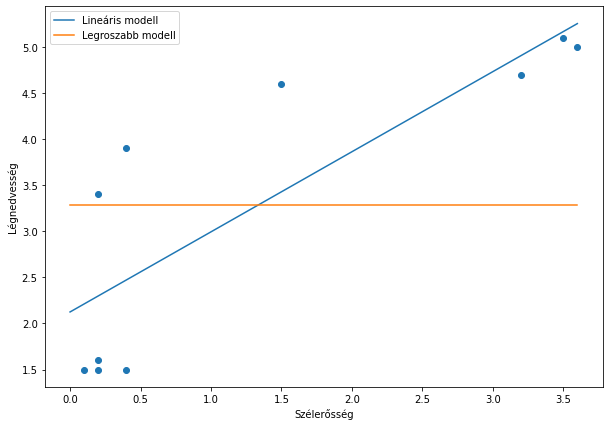

In [5]:
# megfigyelések
plt.scatter(X[:, 1], y)
# model
szel = np.array([0]+sorted(X[:, 1]))
plt.plot(szel, illesztett_model.params[0] + illesztett_model.params[1] * szel, label="Lineáris modell")
plt.plot(szel, [ legroszabb for _ in szel], label="Legroszabb modell")
plt.xlabel("Szélerősség")
plt.ylabel("Légnedvesség")
plt.legend()
plt.show()

In [6]:
# egy Konstans + Szélerősség + Véletlenszerű szám
X = np.array([ [1,x,np.random.uniform(0,3.5)] for x in adatok[:, 1] ])
# model
illesztett_model = sm.OLS(y,X).fit()
print(illesztett_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     14.10
Date:                Sun, 20 Feb 2022   Prob (F-statistic):            0.00351
Time:                        00:17:40   Log-Likelihood:                -10.225
No. Observations:                  10   AIC:                             26.45
Df Residuals:                       7   BIC:                             27.36
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7600      0.743      1.022      0.3

c:\users\attila_sajo\miniconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [7]:
legroszabb = np.mean(adatok[:, 0])
ss_m = np.sum((legroszabb-adatok[:, 0])**2)
legjobb = illesztett_model.params[0] + illesztett_model.params[1] * X[:, 1] + illesztett_model.params[2] * X[:, 2]
ss_l = np.sum((legjobb-adatok[:, 0])**2)

r2 = (ss_m-ss_l)/ss_m
r2a = 1-(1-r2)*(len(adatok)-1)/(len(adatok)-2-1)